# Homework of week 7(Machine Learning)
To preedict whether the income of a preson exceeds 50k $/year  
(Dataset can be accessed from <http://archive.ics.uci.edu/ml/datasets/Adult>)

## Download dataset

In [2]:
import os
import urllib.request

print("Begin downloading adult dataset...")

data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
description_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names"
if not os.path.isfile("adult.data"):
    urllib.request.urlretrieve(data_url, "adult.data")
    urllib.request.urlretrieve(description_url, "adult.names")

Begin downloading adult dataset...


ContentTooShortError: <urlopen error retrieval incomplete: got only 241567 out of 3974305 bytes>

## Data preprocessing

In [71]:
import numpy as np
import pandas as pd
attr = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv("adult.data", names=attr, sep=',')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
y = data["income"]
data.drop(["income"], axis=1, inplace=True)

In [73]:
adult_attr = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
for a in adult_attr:
    data[a] = pd.Categorical(data[a])
    dummies = pd.get_dummies(data[a], prefix="{}_category".format(a))
    data = pd.concat([data, dummies], axis=1)
data.drop(adult_attr, axis=1, inplace=True)
y.replace(" <=50K", 0, inplace=True)
y.replace(" >50K", 1, inplace=True)
# data.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [74]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=1)
print("Train size: {}".format(len(X_train)))
print("Test size: {}".format(len(X_test)))

Train size: 24420
Test size: 8141


In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler().fit(X_train)
train_data = scaler.transform(X_train)
test_data = scaler.transform(X_test)

## Training & Evaluation

In [76]:
```
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)  MSE: 2.045828795017857e+22
print(model.score(data, y))       score: -2.7978527614537078e+22
                                  cross_val_score: [ 3.61336769e-01  3.51589668e-01  3.62655836e-01 -6.47679081e+24, 3.75933675e-01]
```

-2.7978527614537078e+22


In [82]:
```
from sklearn import naive_bayes
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)  MSE：0.1971502272448102
print(model.score(data, y))       score：0.7946623260956359
                                  cross_val_score：[0.7941041  0.79176904 0.79867936 0.79130835 0.79990786]
```

0.7946623260956359


In [85]:
```
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)  MSE：0.17774229210170742
print(model.score(data, y))       score：0.9555296213261264
                                  cross_val_score：[0.81130048 0.81311425 0.80727887 0.81587838 0.81388206]
```

0.9555296213261264


In [88]:
```
from sklearn.svm import SVC (very slow!!!)
model = SVC()
model.fit(X_train, y_train)
y_predict = model.predict(X_test) MSE：0.19223682594275887
print(model.score(data, y))       score：0.7949694419704555
                                  cross_val_score：[0.79548595 0.79376536 0.79468673 0.79637592 0.79422604]
```

0.7949694419704555


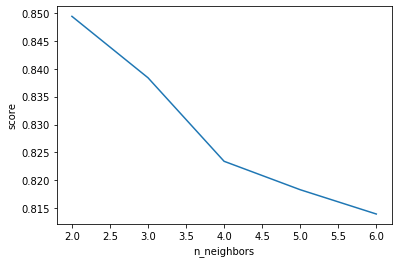

In [96]:
```
from sklearn import neighbors
import matplotlib.pyplot as plt
scores = []
for i in range(2,7):
    model = neighbors.KNeighborsClassifier(n_neighbors=i, n_jobs=1)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores.append(model.score(data, y))
plt.plot(range(2, 7), scores)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.show() # So we choose n_neighbors=2 as the parameter
```

In [97]:
```
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train, y_train)       # MLPC can't work well
y_predict = model.predict(X_test) # MSE：0.16079105760963028
print(model.score(data, y))       # score：0.8376278369828937
```

0.8376278369828937


D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [98]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predict))

0.16079105760963028


In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model, data, y))

D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


## Summary
The best model above is **Decision Tree**, score of which can reaches **0.9555296213261264**.